In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#Capital punishment pre 1974
csv_file_all = "all_encoded.csv"
df_all = pd.read_csv(csv_file_all, dtype=int)
df_all.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed
0,1,4,49,1,1977,1,17,1
1,1,2,12,1,1979,5,25,1
2,1,3,32,1,1979,10,22,1
3,1,2,18,1,1981,3,9,1
4,1,2,51,1,1982,8,10,1


In [11]:
y = df_all["Execution Method"]

In [12]:
X = df_all.drop("Execution Method", axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.999/0.897
k: 3, Train/Test Score: 0.943/0.890
k: 5, Train/Test Score: 0.927/0.888
k: 7, Train/Test Score: 0.918/0.886
k: 9, Train/Test Score: 0.910/0.885
k: 11, Train/Test Score: 0.905/0.883
k: 13, Train/Test Score: 0.901/0.887
k: 15, Train/Test Score: 0.898/0.885
k: 17, Train/Test Score: 0.895/0.883
k: 19, Train/Test Score: 0.891/0.884


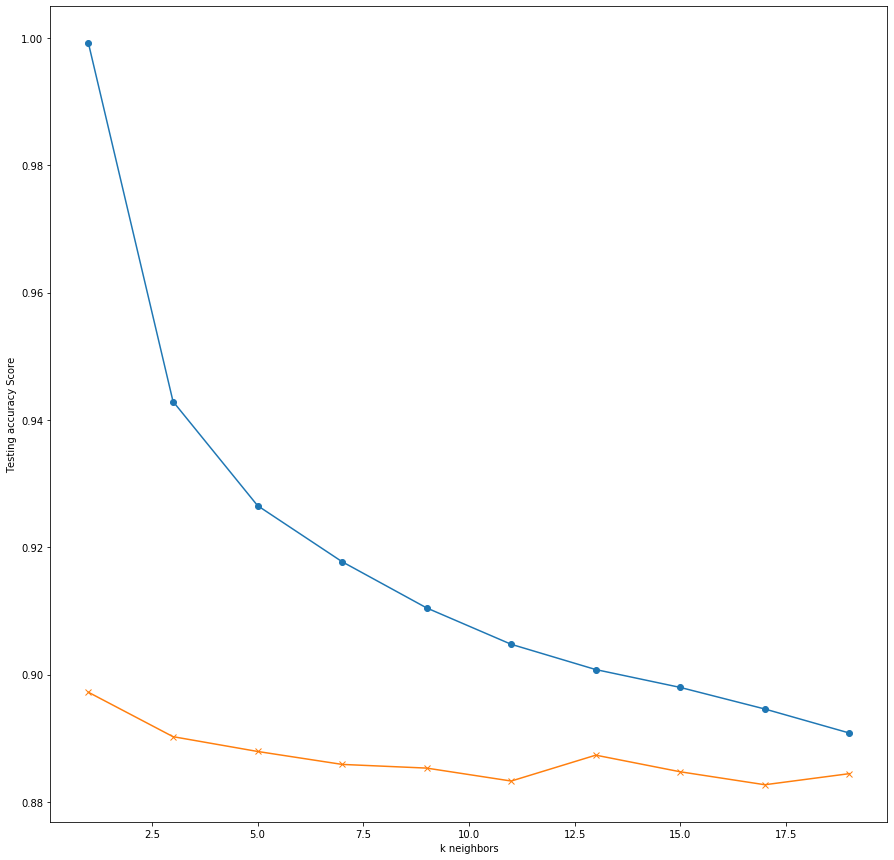

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.figure(figsize=(15,15))
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
plt.savefig('CP-KNN-all.png')

<Figure size 432x288 with 0 Axes>